In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  Language Pair  Average Rating  Standard Dev
0         en-hi        4.875486      0.402704
1         en-es        4.904297      0.476529
2         en-ru        4.952941      0.303751
3      en-zh_cn        4.931641      0.386303
4         en-ja        4.873541      0.552480


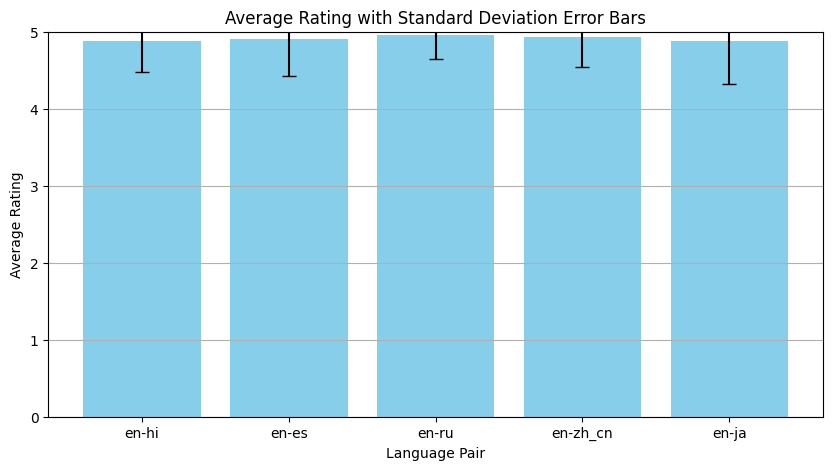

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Replace this with the path to the folder containing your files on Google Drive
folder_path = '/content/drive/MyDrive/EACL/MultilingualLLMBias/translation_ratings/'

# This will automatically get all .csv files in the specified folder
files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Lists to hold the data
language_pairs = ['en-hi', 'en-es', 'en-ru', 'en-zh_cn', 'en-ja']
average_ratings = []
standard_devs = []

# Process each file
for file in files:
    df = pd.read_csv(file)

    # Cleaning the "gpt-4-rating" column and converting it to numeric values
    df['gpt-4-rating'] = pd.to_numeric(df['gpt-4-rating'], errors='coerce')

    # Removing non-numeric rows
    df = df.dropna(subset=['gpt-4-rating'])

    # Calculate the average and standard deviation
    average_ratings.append(df['gpt-4-rating'].mean())
    standard_devs.append(df['gpt-4-rating'].std())

# Create DataFrame
data = pd.DataFrame({
    'Language Pair': language_pairs,
    'Average Rating': average_ratings,
    'Standard Dev': standard_devs
})

# Print and plot
print(data)

plt.figure(figsize=(10,5))
plt.bar(data['Language Pair'], data['Average Rating'], yerr=data['Standard Dev'], capsize=5, color='skyblue')
plt.xlabel('Language Pair')
plt.ylabel('Average Rating')
plt.title('Average Rating with Standard Deviation Error Bars')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.show()